In [190]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

import scipy
import pywt
import mne

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
import glob
import os

In [191]:
sub = '05'
fs = 128
data = loadmat(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed_30Hz/{sub}/eeg_motor_pre_{sub}.mat')
start_idx = 500
end_idx = 70000

In [192]:


def clean_array(data, threshold):
    # Initialize a list to store the cleaned rows
    cleaned_data = []

    # Loop through the rows, skipping the first and last rows for comparison
    for i in range(1, len(data) - 1):
        prev_val = data[i - 1, 0]
        curr_val = data[i, 0]
        next_val = data[i + 1, 0]
        
        # Check if the difference with both previous and next row is at least 256
        if abs(curr_val - prev_val) >= threshold and abs(curr_val - next_val) >= threshold:
            cleaned_data.append(data[i])
    
    # Convert the cleaned data back to a numpy array
    return np.array(cleaned_data)

# Example usage
data_test = np.array([
    [0, 2, 3],
    [100, 4, 5],
    [200, 6, 7],
    [600, 8, 9],
    [2400, 10, 11]
])

cleaned_data = clean_array(data_test, threshold=256)
print(cleaned_data)


[[600   8   9]]


In [193]:
#trim data
eeg_sub = data['trial_data'][37, start_idx:end_idx]
events_sv = data['events'][:, start_idx:end_idx]

#get keystrokes
events_arr = make_raw_events(events_sv)
#t_keystrokes = clean_triggers(events_arr[events_arr[:, 2]==2]) #2 for audio or 6 for MIDI
t_keystrokes = clean_array(events_arr[events_arr[:, 2]==2], threshold=180) #2 for audio or 6 for MIDI

print(t_keystrokes)

keystroke_times = t_keystrokes[:, 0]/fs

#make time vector
n_times = eeg_sub.shape[0]
times = np.linspace(0, n_times/fs, n_times+1)[0:n_times]

[[14392     0     2]
 [38238     0     2]
 [61426     0     2]]


In [179]:
cwtmatr, freqs, wavelet = morwav_trans(eeg_sub, 
                                       centerfreq = 1, 
                                       bandwidth = 1.5, 
                                       scale_values = [6,150,40])

(10.0, 32.0)

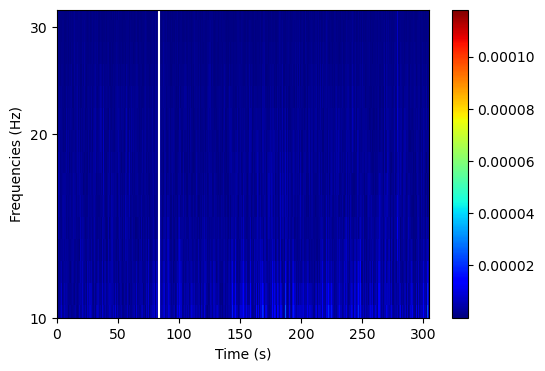

In [180]:
plot_scaleogram(cwtmatr, freqs, times)
plt.vlines(keystroke_times, 0,32, color = 'white')
plt.ylim(10,32)